<a href="https://colab.research.google.com/github/LYQ7220/Clustering-on-World-Food-Facts-Dataset/blob/master/Homework_6_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Food Facts

* Original Data Source:  https://www.kaggle.com/openfoodfacts/world-food-facts
* Modified Source:  https://www.kaggle.com/lwodarzek/nutrition-table-clustering/output
* Good Example:  https://www.kaggle.com/allunia/hidden-treasures-in-our-groceries

PCA Information:



*   https://www.scikit-yb.org/en/latest/api/features/pca.html
*   https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
*   https://aws.amazon.com/blogs/machine-learning/analyze-us-census-data-for-population-segmentation-using-amazon-sagemaker/


Other Data Source



*   https://github.com/noahgift/sugar

Longevity


* https://catalog.data.gov/dataset/community-health-status-indicators-chsi-to-combat-obesity-heart-disease-and-cancer
* https://catalog.data.gov/dataset/healthy-aging-data-466f7
* https://www.icpsr.umich.edu/icpsrweb/NACDA/studies/24901/version/2/datadocumentation And * * https://sites.duke.edu/centerforaging/programs/chinese-longitudinal-healthy-longevity-survey-clhls/cross-sectional-dataset/longitudinal-panel-datasets/ 




### Setup Tasks 

#### Install Latest Plotly

In [0]:
import plotly
plotly.__version__

'3.6.1'

In [0]:
!pip uninstall -q -y plotly
!pip install plotly==3.6.0

    100% |████████████████████████████████| 31.1MB 1.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/67/0b/29/08c7f5caed2d1ac446db982ff607b326d49bfa0bd3a67ef8c7
Successfully built plotly


In [0]:
import plotly
plotly.__version__

'3.6.1'

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

## Ingest

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/noahgift/food/master/data/features.en.openfoodfacts.org.products.csv")
df.drop(["Unnamed: 0", "exceeded", "g_sum", "energy_100g"], axis=1, inplace=True) #drop two rows we don't need
df = df.drop(df.index[[1,11877]]) #drop outlier
df.rename(index=str, columns={"reconstructed_energy": "energy_100g"}, inplace=True)
df.head()

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,product
0,28.57,64.29,14.29,3.57,0.00000,2267.85,Banana Chips Sweetened (Whole)
2,57.14,17.86,3.57,17.86,1.22428,2835.70,Organic Salted Nut Mix
3,18.75,57.81,15.62,14.06,0.13970,1953.04,Organic Muesli
4,36.67,36.67,3.33,16.67,1.60782,2336.91,Zen Party Mix
5,18.18,60.00,21.82,14.55,0.02286,1976.37,Cinnamon Nut Granola


## EDA

In [0]:
df.columns

Index(['fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'energy_100g', 'product'],
      dtype='object')

Rows and Attributes

In [0]:
df.shape

(45026, 7)

First 10 Columns

## Sorting

### Sort by One Column:  Protein

In [0]:
df.sort_values(by=["proteins_100g"], ascending=False).head(10)

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,product
2377,0.00,0.00,0.00,100.00,0.00000,1700.00,Unflavored Gelatin
37027,0.00,0.00,0.00,100.00,0.36322,1700.00,Unflavored Gelatin
16674,6.82,22.73,13.64,86.36,14.77772,2120.51,"Fisherman's Wharf, Cocktail Shrimp"
37415,3.33,6.67,3.33,83.33,0.67818,1659.87,"Whey & Soy Protein, Flavored Drink Mix, Vanilla"
133,4.60,8.80,6.00,78.05,1.21158,1655.85,Whey Protein aus Molke 500 Gramm Vanilla
131,4.60,8.80,6.00,78.05,1.21158,1655.85,Whey Protein aus Molke 1000 Gramm Vanilla
129,4.60,8.80,6.00,78.05,1.21158,1655.85,Whey Protein aus Molke Vanilla
33115,1.67,13.33,0.00,76.67,0.00000,1595.13,Vital Wheat
37392,6.25,8.33,4.17,75.00,0.63500,1660.36,"Whey Protein Powder, Chocolate"
16669,5.36,21.43,14.29,67.86,12.79144,1726.97,"Fisherman's Wharf, Cocktail Shrimp"


### Sort by Two Columns:  Sugar, Salt

In [0]:
df.sort_values(by=["sugars_100g", "salt_100g"], ascending=[False, False]).head(10)

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,product
33151,0.0,0.0,100.0,0.0,71.1200,0.0,"Turkey Brine Kit, Garlic & Herb"
24783,0.0,100.0,100.0,0.0,24.1300,1700.0,Seasoning
4073,0.0,100.0,100.0,0.0,7.6200,1700.0,"Seasoning Rub, Sweet & Spicy Seafood"
10282,0.0,100.0,100.0,0.0,2.5400,1700.0,Instant Pectin
17880,0.0,100.0,100.0,0.0,0.6350,1700.0,Cranberry Cosmos Cocktail Rimming Sugar
8822,0.0,100.0,100.0,0.0,0.5588,1700.0,"Alaga, The Original Cane Flavor Syrup, Cane"
8823,0.0,100.0,100.0,0.0,0.5588,1700.0,The Original Cane Syrup
41157,0.0,100.0,100.0,0.0,0.3175,1700.0,Panela Brown Sugar Cane
41158,0.0,100.0,100.0,0.0,0.3175,1700.0,Panela Brown Sugar Cane
41159,0.0,100.0,100.0,0.0,0.3175,1700.0,Panela


## Visualizations

### Histogram

Generate distributions based on energy type

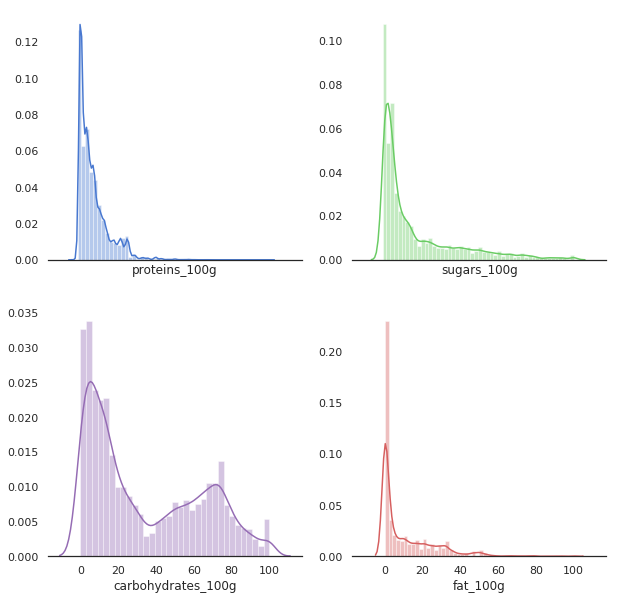

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
sns.set(style="white", palette="muted", color_codes=True)


# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df.proteins_100g, color="b", ax=axes[0, 0])
sns.distplot(df.sugars_100g, color="g", ax=axes[0, 1])
sns.distplot(df.fat_100g, color="r", ax=axes[1, 1])
sns.distplot(df.carbohydrates_100g, color="m", ax=axes[1, 0])

### Word Cloud

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#### High protein foods

Find protein foods in the 98th percentile

In [0]:
high_protein_df = df[df.proteins_100g > df.proteins_100g.quantile(.98)]
high_protein_text = high_protein_df['product'].values
len(high_protein_text)

896

Word Cloud High Protein

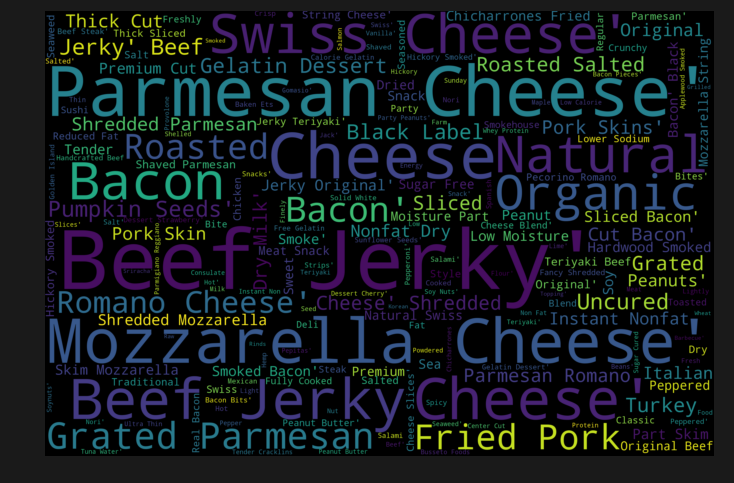

In [0]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(high_protein_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### High fat foods

Find fatty foods in the 98th percentile

In [0]:
high_fat_df = df[df.fat_100g > df.fat_100g.quantile(.98)]
high_fat_text = high_fat_df['product'].values
len(high_fat_text)

878

Word Cloud High Fat

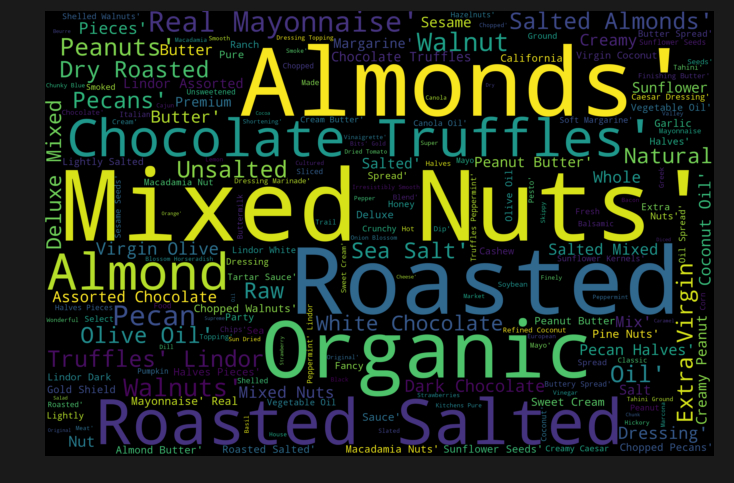

In [0]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(high_fat_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### High sugar foods

Find sugary foods in the 98th percentile

In [0]:
high_sugar_df = df[df.sugars_100g > df.sugars_100g.quantile(.98)]
high_sugar_text = high_sugar_df['product'].values
len(high_sugar_text)

893

Word Cloud High Sugar

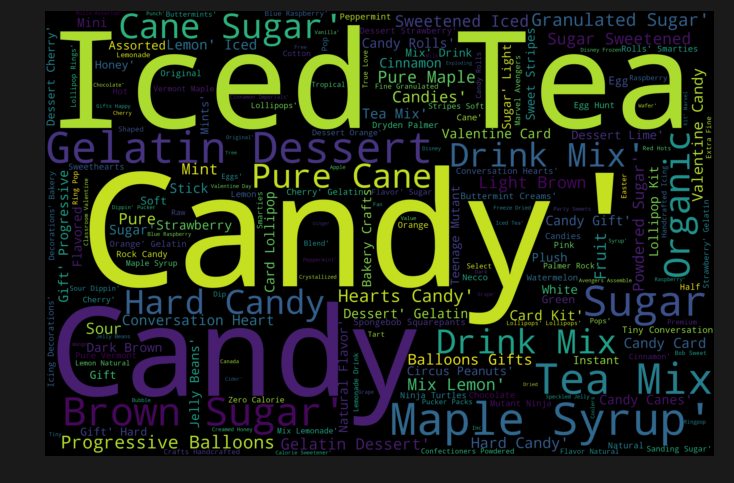

In [0]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(high_sugar_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Topic Modeling 

### Gensim example

Preprocess Text

In [0]:
dataset = df['product'].fillna("").values
raw_text_data = [d.split() for d in dataset]

Setup Stop Words

In [0]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Remove stop words


In [0]:
text_data = [item for item in raw_text_data if item not in stop]

In [0]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [0]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(
    corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.036*"&" + 0.026*"Mix" + 0.025*"Light" + 0.024*"Chicken"')
(1, '0.028*"Juice" + 0.027*"Cream" + 0.026*"Sauce" + 0.021*"Butter"')
(2, '0.050*"Chocolate" + 0.041*"Candy" + 0.026*"Milk" + 0.019*"Bread"')
(3, '0.027*"In" + 0.025*"&" + 0.020*"Sliced" + 0.020*"Roasted"')
(4, '0.083*"Cheese" + 0.027*"Beans" + 0.024*"Dressing" + 0.022*"Green"')


## Clustering

In [0]:
df.columns

Index(['fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'energy_100g', 'product'],
      dtype='object')

### Create Features to Cluster

In [0]:
df_cluster_features = df.drop("product", axis=1)

### Scale the data

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df_cluster_features))
print(scaler.transform(df_cluster_features))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[2.85700000e-01 6.42900000e-01 1.53063241e-01 6.89388819e-02
  0.00000000e+00 5.06782123e-01]
 [5.71400000e-01 1.78600000e-01 4.71343874e-02 2.06913199e-01
  6.02500000e-04 6.33675978e-01]
 [1.87500000e-01 5.78100000e-01 1.66205534e-01 1.70223038e-01
  6.87500000e-05 4.36433520e-01]
 ...
 [0.00000000e+00 1.33300000e-01 1.43577075e-01 3.44694410e-02
  1.87500000e-05 5.06391061e-02]
 [0.00000000e+00 1.62500000e-01 1.72430830e-01 3.44694410e-02
  1.87500000e-05 6.17318436e-02]
 [0.00000000e+00 0.00000000e+00 1.18577075e-02 3.44694410e-02
  0.00000000e+00 0.00000000e+00]]


#### Cluster Diagnostics

**Three **clusters seem ideal

##### Yellowbrick Visualizer Elbow Method

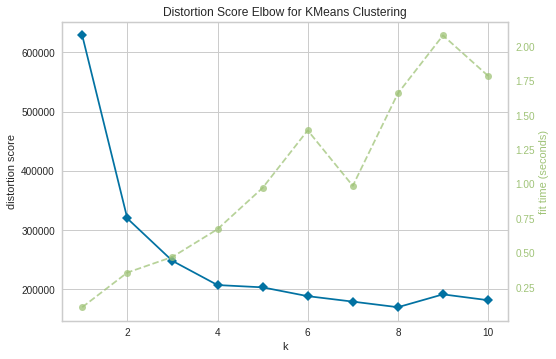

In [0]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df_cluster_features)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

##### Yellowbrick Silhouette Visualizer


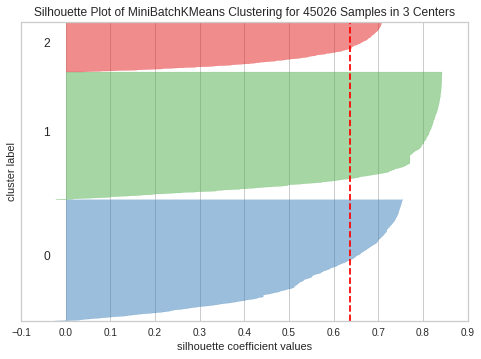

In [0]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_cluster_features) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

### Add Cluster Labels

In [0]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
kmeans = k_means.fit(scaler.transform(df_cluster_features))
df['cluster'] = kmeans.labels_
df.head()

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,product,cluster
0,28.57,64.29,14.29,3.57,0.00000,2267.85,Banana Chips Sweetened (Whole),0
2,57.14,17.86,3.57,17.86,1.22428,2835.70,Organic Salted Nut Mix,0
3,18.75,57.81,15.62,14.06,0.13970,1953.04,Organic Muesli,0
4,36.67,36.67,3.33,16.67,1.60782,2336.91,Zen Party Mix,0
5,18.18,60.00,21.82,14.55,0.02286,1976.37,Cinnamon Nut Granola,0


## 3D ClusterPlot

#### Protein-Fat-Carb 3D Plot

In [0]:
import plotly.offline as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode
enable_plotly_in_cell()


trace1 = go.Scatter3d(
    x=df["fat_100g"],
    y=df["carbohydrates_100g"],
    z=df["proteins_100g"],
    mode='markers',
    text=df["product"],
    marker=dict(
        size=12,
        color=df["cluster"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
#print(trace1)
data = [trace1]
layout = go.Layout(
    showlegend=False,
    title="Protein-Fat-Carb:  Food Energy Types",
    scene = dict(
        xaxis = dict(title='X: Fat Content-100g'),
        yaxis = dict(title="Y:  Carbohydrate Content-100g"),
        zaxis = dict(title="Z:  Protein Content-100g"),
    ),
    width=1000,
    height=900,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

#### Sugar-Salt-Carb-3D Plot

In [0]:
import plotly.offline as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode
enable_plotly_in_cell()


trace1 = go.Scatter3d(
    x=df["sugars_100g"],
    y=df["carbohydrates_100g"],
    z=df["salt_100g"],
    mode='markers',
    text=df["product"],
    marker=dict(
        size=12,
        color=df["cluster"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
#print(trace1)
data = [trace1]
layout = go.Layout(
    showlegend=False,
    title="Sugar, Carb, Salt:  Food Energy Types",
    scene = dict(
        xaxis = dict(title='X: Sugar Content-100g'),
        yaxis = dict(title="Y: Carbohydrate Content-100g"),
        zaxis = dict(title="Z: Salt Content-100g"),
    ),
    width=1000,
    height=900,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

##PCA

In [0]:
df_cluster_features_scale = scaler.transform(df_cluster_features)

In [0]:
df_cluster_features_scale = pd.DataFrame(df_cluster_features_scale, columns = df_cluster_features.columns); df_cluster_features_scale.head()

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g
0,0.2857,0.6429,0.153063,0.068939,0.000000,0.506782
1,0.5714,0.1786,0.047134,0.206913,0.000603,0.633676
2,0.1875,0.5781,0.166206,0.170223,0.000069,0.436434
3,0.3667,0.3667,0.044763,0.195423,0.000791,0.522215
4,0.1818,0.6000,0.227470,0.174954,0.000011,0.441647


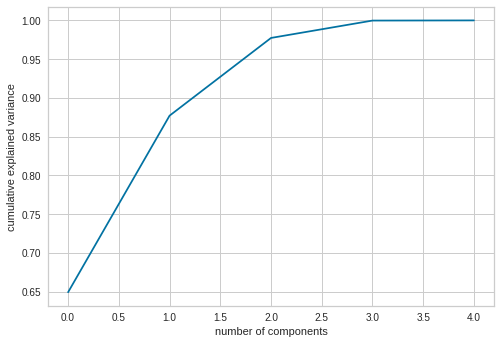

In [0]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components='mle')
pca.fit(df_cluster_features_scale)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#plt.plot(pca.explained_variance_ratio_[:10])
#print(pca.explained_variance_ratio_)

**Interpret component**

- PC1 represents food with high carbohydrates, sugars and energy
- PC2 represents food with high fat and energy

In [0]:
components = pd.DataFrame(pca.components_[:2], columns = df_cluster_features_scale.columns)
component_1 = components.iloc[0,:]
component_1[abs(component_1)>0.3]

carbohydrates_100g    0.810475
sugars_100g           0.479635
energy_100g           0.333767
Name: 0, dtype: float64

In [0]:
component_2 = components.iloc[1,:]
component_2[abs(component_2)>0.3]

fat_100g       0.681068
energy_100g    0.630566
Name: 1, dtype: float64

In [0]:
# transform the original user feature df to PCA df
cluster_features_2d = pd.DataFrame(pca.transform(df_cluster_features_scale)).iloc[:,:2]
cluster_features_2d.index = df_cluster_features.index
cluster_features_2d.rename({0:'PC1',1:'PC2'},axis=1,inplace=True)
cluster_features_2d.head()

,PC1,PC2
0,0.330333,0.247343
2,-0.046094,0.635527
3,0.255258,0.161027
4,0.060569,0.401966
5,0.303839,0.141346


##### Yellowbrick Visualizer Elbow Method

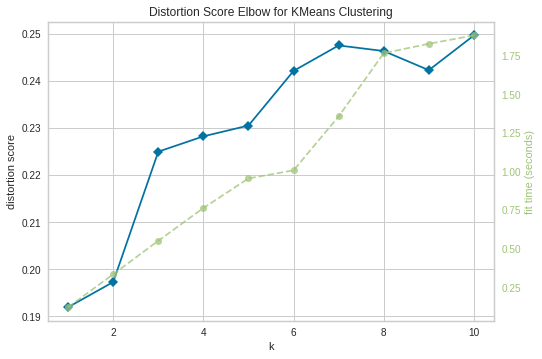

In [0]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df_cluster_features_scale)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [0]:
k_means = KMeans(n_clusters = 2)
kmeans = k_means.fit(scaler.transform(df_cluster_features_scale))
df['PC1'] = cluster_features_2d.PC1
df['PC2'] = cluster_features_2d.PC2
df['cluster'] = kmeans.labels_
df.head()

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,product,cluster,PC1,PC2
0,28.57,64.29,14.29,3.57,0.00000,2267.85,Banana Chips Sweetened (Whole),1,0.330333,0.247343
2,57.14,17.86,3.57,17.86,1.22428,2835.70,Organic Salted Nut Mix,0,-0.046094,0.635527
3,18.75,57.81,15.62,14.06,0.13970,1953.04,Organic Muesli,1,0.255258,0.161027
4,36.67,36.67,3.33,16.67,1.60782,2336.91,Zen Party Mix,0,0.060569,0.401966
5,18.18,60.00,21.82,14.55,0.02286,1976.37,Cinnamon Nut Granola,1,0.303839,0.141346


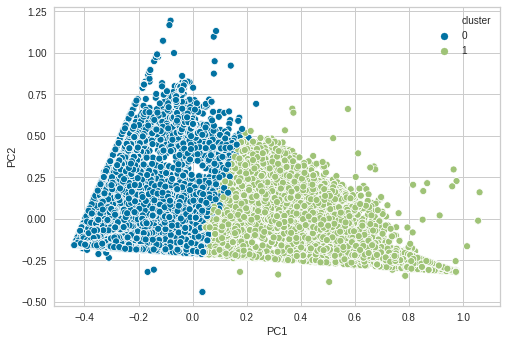

In [0]:
import seaborn as sns
sns.scatterplot(x = "PC1", y="PC2",
                     hue="cluster",  data = df)